# 1. Dynamical systems in Julia

In the following we will be introducing the award-winning Julia package **DynamicalSystems.jl**. You can find the official documentation online, on GitHub:

https://juliadynamics.github.io/DynamicalSystems.jl/dev/

The following map showcases the features of **DynamicalSystems.jl**.

![](ds_map.png)

Only a few features of the ecosystem will be shown. For the rest, we point to the [official documentation](https://juliadynamics.github.io/DynamicalSystems.jl/dev/).

## 1.A. Creating an instance of a dynamical system

### What _is_ a dynamical system?

A "dynamical system" is a rule that describes how some variables $\vec{u}$ should evolve in time. This law is described by the "equations of motion" function $\vec{f}$.

There are two types of dynamical systems (in our case):

1. One is called a map, where time is a discrete quantity (like "steps" or "generations"). The equations of motion then look something like $\vec{u}_{n+1} = \vec{f}(\vec{u}_n, p, n)$ where $n$ is an integer and $p$ are the parameters of the system.

2. The other type is called an Ordinary Differential Equation (ODE), where time is a continuous quantity. Then, the equations of motion give the time derivatives of the variables: $\frac{d\vec{u}}{dt} = \vec{f}(\vec{u}, p, t)$.

In both cases $\vec{u}$ is the state of the system, a vector of the variables that define the system. For example, $\vec{u}$ may be defined as $(x, y, z)$, or as $(\theta, I)$, or as $(V, I, R, C_1, C_2)$, etc.

---


### Creating a simple discrete system


A `DynamicalSystem` is a Julia `struct` that contains all the information of a dynamical system:
1. Equations of motion function $\vec{f}$
3. Initial state.
4. Parameter container (if the equations of motion are parameterized).
5. Jacobian of the equations of motion.

---

For simplicity let's focus on creating a simple discrete chaotic system, the [Hénon map](https://en.wikipedia.org/wiki/H%C3%A9non_map). 

The constructor we need is:

```julia
DiscreteDynamicalSystem(eom, state, p)
```

In order to construct a Hénon map, let's discuss the input arguments we need to pass to this constructor!

### (1) Equations of motion
The first argument of the above constructor -`eom`- is a **function** representing the equations of motion.

Therefore, the first step in creating a `DynamicalSystem` is to define the equations of motion. For the Hénon map they have the form:

$$
\begin{aligned}
x_{n+1} &= 1 - ax^2_n+y_n \\
y_{n+1} & = bx_n
\end{aligned}
$$

Now we must make a function out of them. There is some strictness when writing this function in Julia. Specifically, it can only be one of two forms: out-of-place (oop) or in-place (iip). Here is how to define it:

* **oop** : The `eom` function **must** be in the form `eom(x, p, t) -> SVector`
  which means that given a state `x::SVector` and some parameter container
  `p` it returns a [`SVector`](http://juliaarrays.github.io/StaticArrays.jl/stable/pages/api.html#SVector-1)
  (from the [StaticArrays](https://github.com/JuliaArrays/StaticArrays.jl) module)
  containing the next state.
* **iip** : The `eom` function **must** be in the form `eom!(xnew, x, p, t)`
  which means that given a state `x::Vector` and some parameter container `p`,
  it writes in-place the new state in `xnew`.

We advise to use **oop** for systems with dimension < 11, and use **iip** otherwise.

*If you are familiar with [DifferentialEquations.jl](http://docs.juliadiffeq.org/latest/), then notice that the equations of motion are defined in an identical manner*

---

Because the Hénon map is only 2-dimensional, we follow the advice of the documentation and take advantage of the [`StaticArrays`](https://github.com/JuliaArrays/StaticArrays.jl) module.

In [1]:
using DynamicalSystems
using PyPlot
PyPlot.rc("font", size = 16)          # set default fontsize
PyPlot.rc("figure", figsize = (6, 4)) # set default figsize

In [2]:
h_eom(x, p, t) = SVector{2}(1.0 - p[1]*x[1]^2 + x[2], p[2]*x[1])

h_eom (generic function with 1 method)

* Remember: *both* `p` (for parameters) and `t` (for time) must be included in the equations of motion function, irrespective of whether they are used or not!

### (2) Initial State

The second argument for the `DiscreteDynamicalSystem` constructor is a `state`, which represents the initial condition for the system:

In [3]:
state = zeros(2) # doesn't matter if we use Vector of SVector for the `state`

2-element Array{Float64,1}:
 0.0
 0.0

### (3) Parameters for the EOM

Then, the last argument, `p`, is simply a parameter container.It is best to use a mutable container that can be accessed with brackets (`getindex`).

In [4]:
p = [1.4, 0.3] # p = [a, b] from the equations of motion

2-element Array{Float64,1}:
 1.4
 0.3

These 3 things are enough to make a `DynamicalSystem`:

In [5]:
henon = DiscreteDynamicalSystem(h_eom, state, p)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      h_eom
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.4, 0.3]

## 1.B. Getting a trajectory

Now that we have created the system, the first (and most basic) thing to do is to simply plot its time evolution and see what it looks like. 

The `trajectory` function is a convenient tool that evolves the system and returns the output at equally spaced time intervals. The call signature is simply:

```julia
trajectory(ds::DynamicalSystem, T [, u]; kwargs...)
```
which evolves a system for total time `T`, optionally starting from a different state `u`.

In [6]:
# trajectory from initial condition
tr = trajectory(henon, 100000)

2-dimensional Dataset{Float64} with 100001 points
  0.0        0.0      
  1.0        0.0      
 -0.4        0.3      
  1.076     -0.12     
 -0.740886   0.3228   
  0.554322  -0.222266 
  0.347552   0.166297 
  0.997188   0.104265 
 -0.287871   0.299156 
  1.18314   -0.0863614
 -1.0461     0.354942 
 -0.177128  -0.313831 
  0.642244  -0.0531385
  ⋮                   
  0.582553   0.103    
  0.627885   0.174766 
  0.622831   0.188365 
  0.64528    0.186849 
  0.603908   0.193584 
  0.682997   0.181173 
  0.528095   0.204899 
  0.814462   0.158428 
  0.229742   0.244338 
  1.17044    0.0689225
 -0.848995   0.351133 
  0.342024  -0.254698 

trajectory returns an object that is a `Dataset`. A `Dataset` is a wrapper of `Vector{SVector}` that can be accessed like a matrix. More on `Dataset` on the chapter on `DelayEmbeddings`!

In [7]:
# trajectory from a different starting point
tr2 = trajectory(henon, 100000, 0.01rand(2))

2-dimensional Dataset{Float64} with 100001 points
  0.00894317   0.00559992
  1.00549      0.00268295
 -0.412725     0.301646  
  1.06317     -0.123818  
 -0.706272     0.31895   
  0.620602    -0.211882  
  0.248912     0.186181  
  1.09944      0.0746737 
 -0.617603     0.329832  
  0.795825    -0.185281  
 -0.0719531    0.238747  
  1.2315      -0.0215859 
 -1.14481      0.36945   
  ⋮                      
  0.561718     0.110311  
  0.668573     0.168515  
  0.542729     0.200572  
  0.788196     0.162819  
  0.293065     0.236459  
  1.11622      0.0879196 
 -0.656396     0.334865  
  0.731668    -0.196919  
  0.0536084    0.2195    
  1.21548      0.0160825 
 -1.05226      0.364643  
 -0.185495    -0.315677  

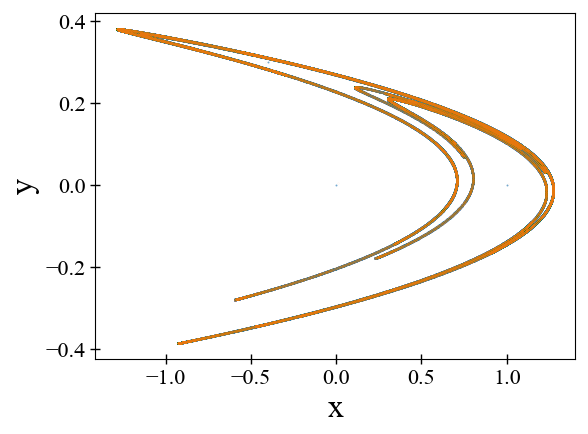

In [8]:
figure(figsize=(6,4))
plot(tr[:, 1], tr[:, 2], lw = 0.0, marker = "s", ms = 0.5, alpha = 0.5);
plot(tr2[:, 1], tr2[:, 2], lw = 0.0, marker = "o", ms = 0.05, alpha = 0.5);
xlabel("x"); ylabel("y");

## 1.C. Jacobian Function
Let's see `henon` again:

In [9]:
henon

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      h_eom
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.4, 0.3]

* The last line, "`jacobian:  ForwardDiff`"
says that the Jacobian function of the equations of motion was computed automatically using the module [`ForwardDiff`](http://www.juliadiff.org/ForwardDiff.jl/stable/user/api.html). 
* The Jacobian function is a crucial component of a dynamical system, and that is why if it is not given, it is computed automatically.



Even though the automatic computation is very efficient, the best possible performance will come if you pass a "hard-coded" jacobian:

In [10]:
h_jacobian(x, p, t) = @SMatrix [-2*p[1]*x[1] 1.0; p[2] 0.0]

h_jacobian (generic function with 1 method)

* Notice that for **out-of-place** systems, the Jacobian must also have the same form as the equations of motion, namely to return an `SMatrix`.

Now, we can pass this Jacobian function to the `DiscreteDynamicalSystem` constructor as a 4th argument:

In [11]:
henon_with_jac = DiscreteDynamicalSystem(h_eom, state, p, h_jacobian)

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      h_eom
 in-place?    false
 jacobian:    h_jacobian
 parameters:  [1.4, 0.3]

Even though `ForwardDiff` is truly performant, the hard-coded version should "always" be faster. 

*This becomes much more important for higher dimensional systems, especially for the in-place form!*

## 1.D. Identical handling for continuous and discrete systems
* The process of creating a continuous system is identical to that of a discrete system, except that the constructor `ContinuousDynamicalSystem` is used instead. 
* In this case the function `eom` returns the time derivatives and not a "next state".


---



* We will take the opportunity to show the process of using in-place equations of motion for a continuous system, which is aimed to be used for large systems (dimensionality $\ge$ 10).

* In addition, the system we will use (Henon-Heiles) does not have any parameters.

$$
\begin{aligned}
\dot{x} &= p_x \\
\dot{y} &= p_y \\
\dot{p}_x &= -x -2 xy \\
\dot{p}_y &= -y - (x^2 - y^2)
\end{aligned}
$$

In [12]:
# Henon-heiles famous system
# in-place form of equations of motion
# du is the derivatives vector, u is the state vector
function hheom!(du, u, p, t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = -u[1] - 2u[1]*u[2]
    du[4] = -u[2] - (u[1]^2 - u[2]^2)
    return nothing
end

# pass `nothing` as the parameters, because the system doesn't have any
hh = ContinuousDynamicalSystem(hheom!, [0, -0.25, 0.42081, 0], nothing)

4-dimensional continuous dynamical system
 state:       [0.0, -0.25, 0.42081, 0.0]
 e.o.m.:      hheom!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  nothing

Great, now we can get a trajectory of this system, by solving using DifferentialEquations.jl

In [13]:
tr = trajectory(hh, 100.0, dt = 0.05)

4-dimensional Dataset{Float64} with 2001 points
  0.0        -0.25      0.42081   0.0      
  0.0210361  -0.24961   0.420547  0.0156079
  0.0420459  -0.248441  0.419755  0.0311131
  0.0630027  -0.246502  0.418429  0.0464137
  0.0838797  -0.243805  0.416557  0.0614095
  0.104649   -0.240367  0.414125  0.0760025
  0.125283   -0.236213  0.411116  0.0900977
  0.145751   -0.231368  0.407508  0.103604 
  0.166023   -0.225864  0.403277  0.116435 
  0.186068   -0.219737  0.398396  0.128509 
  0.205851   -0.213026  0.392838  0.139751 
  0.22534    -0.205777  0.386572  0.150091 
  0.244496   -0.198033  0.379568  0.159466 
  ⋮                                        
 -0.116577   -0.263     0.370759  0.157468 
 -0.0979725  -0.254732  0.373344  0.17319  
 -0.0792484  -0.245689  0.375555  0.188442 
 -0.0604236  -0.235897  0.377364  0.20314  
 -0.0415192  -0.225386  0.378735  0.217205 
 -0.0225581  -0.214188  0.379631  0.230562 
 -0.0035648  -0.202342  0.38001   0.243138 
  0.0154336  -0.189889  0.37

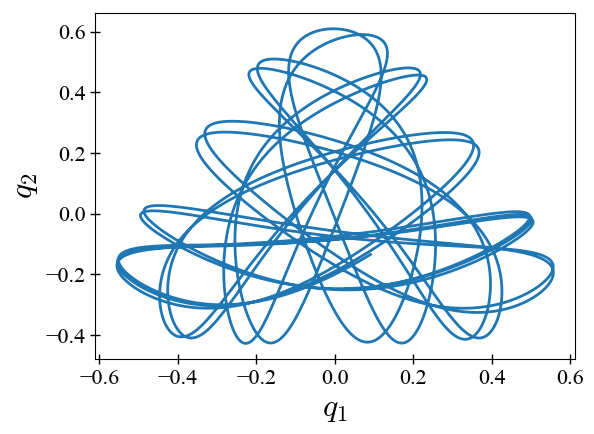

In [14]:
figure(figsize = (6,4))
plot(tr[:, 1], tr[:, 2]);
xlabel("\$q_1\$"); ylabel("\$q_2\$");

# 2. ChaosTools: things to do with a `DynamicalSystem`

`ChaosTools` is a module provided by **DynamicalSystems.jl**. It offers a lot of tools that one can use to study dynamical systems. Here we will only see briefly a few of them.

## 2.A. Poincaré Surface of Section
This is a technique to reduce a continuous system into a discrete map with 1 fewer dimension.
The wikipedia entry on [Poincaré map](https://en.wikipedia.org/wiki/Poincar%C3%A9_map) has a lot of useful info, but the technique itself is very simple:

1. Define a hyperplane in the phase-space of the system. 
2. Evolve the continuous system for long times. Each time the trajectory crosses this plane, record the state of the system.
3. Only crossings with a specific direction (either positive or negative) are allowed.

And that's it! The recorded crossings are the Poincaré Surface of Section!

### Defining a hyperplane
Let's say that our phase-space is $D$ dimensional. If the state of the system is $\mathbf{u} = (u_1, \ldots, u_D)$ then the equation for a hyperplane is 

$$
a_1u_1 + \dots + a_Du_D = \mathbf{a}\cdot\mathbf{u}=b 
$$
where $\mathbf{a}, b$ are the parameters that define the hyperplane.

---

Here is the call signature for a function that does this:

```julia
poincaresos(continuous_system, plane, tfinal = 100.0; kwargs...)
```
In code, `plane` can be either:

* A `Tuple{Int, <: Number}`, like `(j, r)` : the hyperplane is defined as when the `j`-th variable of the system crosses the value `r`.
* An `AbstractVector` of length `D+1`. The first `D` elements of the vector correspond to $\mathbf{a}$ while the last element is $b$. The hyperplane is defined with its formal equation.

---

As an example, let's see a section of the Lorenz system:
$$
\begin{aligned}
\dot{X} &= \sigma(Y-X) \\
\dot{Y} &= -XZ + \rho X -Y \\
\dot{Z} &= XY - \beta Z
\end{aligned}
$$


In [15]:
lor = Systems.lorenz()

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 28.0, 2.66667]

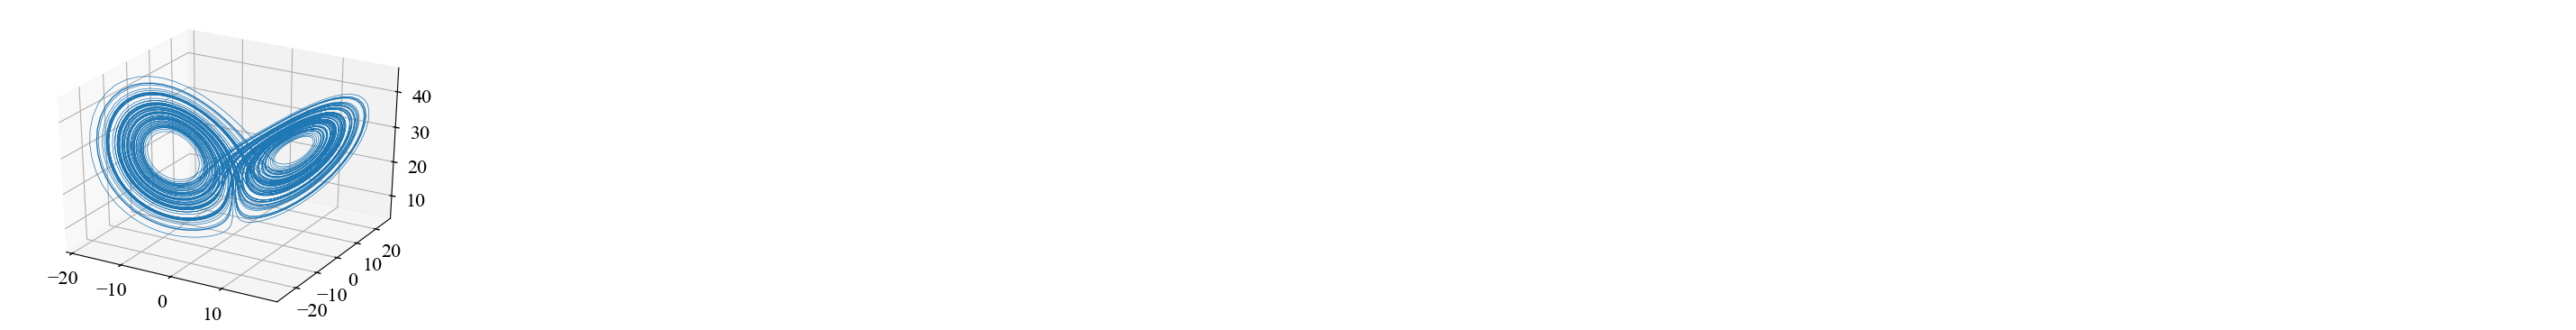

In [16]:
tr = trajectory(lor, 100.0, dt = 0.01, Ttr = 50.0)
figure(figsize = (6,4))
x, y, z = columns(tr)
plot3D(x,y,z, lw = 0.5);

**First, let's visualize the Poincaré Surface of Section in 3D**

In [17]:
c = Vector{String}(undef, length(y))
for i in 1:length(y) # cut points: red
    if -0.1 < y[i] < 0.1
        c[i] = "C3"
    elseif y[i] < 0 
        c[i] = "C0" # in front of cut: blue
    else
        c[i] = "C2" # behind cut: green
    end
end

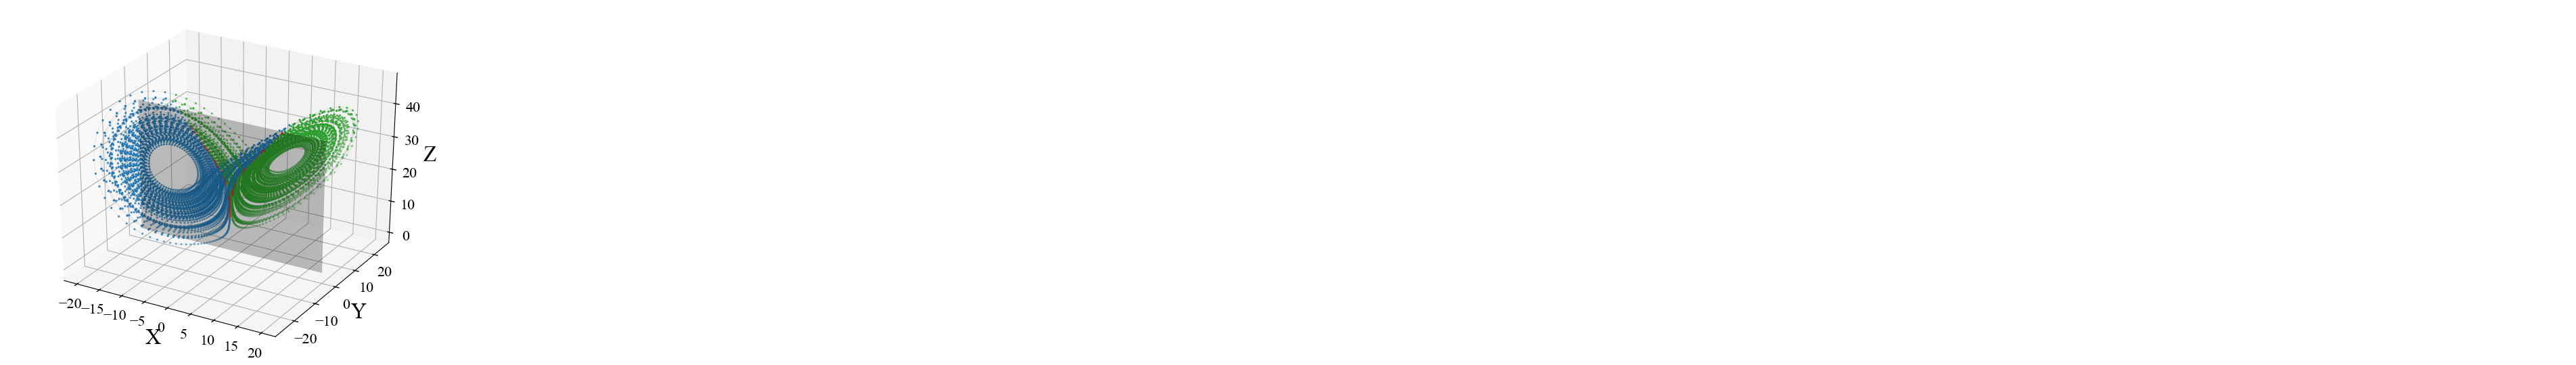

In [18]:
figure(figsize = (8,6))

# First let's plot the attractor
plot3D(x,y,z, color = "black", lw = 0.2, alpha = 0.25)
scatter3D(x, y, z, color = c, s = 3.0)

# And then plot the PSOS plane:
function meshgrid(vx, vy)
    m, n = length(vy), length(vx)
    vx = reshape(vx, 1, n); vy = reshape(vy, m, 1)
    (repeat(vx, m, 1), repeat(vy, 1, n))
end
xx = [-20, 20]; zz = [0, 40]; 
X, Z = meshgrid(xx, zz)
Y = zero(X)

plot_surface(X, Y, Z, alpha = 0.25, color = "k");
xlabel("X"); ylabel("Y"); zlabel("Z");

**Now let's use the `poincaresos` function**

In [19]:
plane = (2, 0.0) # when 2nd variable crosses 0.0

(2, 0.0)

In [20]:
psos_chaotic = poincaresos(lor, plane, 2000.0, Ttr = 100.0)

3-dimensional Dataset{Float64} with 937 points
  -6.84084    -3.26833e-7   32.6236
 -10.9323     -1.51611e-8   39.4884
   2.42964     4.98167e-8   24.653 
  -7.48051    -2.16374e-7   33.6897
 -13.5586     -2.89842e-8   44.0752
 -12.2479      6.38744e-9   41.7609
   0.0820689  -7.76434e-10  14.0957
  -6.44293    -3.98101e-7   31.9586
 -10.2996     -5.97271e-10  38.4108
  -9.52617    -5.72668e-8   37.105 
 -12.9207      4.84257e-11  42.9422
   0.741676   -1.46593e-10  19.7543
  -6.42726    -3.95583e-7   31.9323
   ⋮                               
 -12.5787     -9.92325e-9   42.34  
 -12.32       -2.11224e-11  41.8868
   1.15626    -3.38947e-10  21.3312
  -6.41022    -3.25056e-7   31.9038
 -10.2561     -2.35591e-9   38.337 
  -9.1624     -7.75563e-10  36.4944
 -10.0302     -1.6222e-8    37.9547
   2.19418     1.83043e-8   24.1266
  -6.98386    -5.25592e-7   32.8626
 -11.227       2.84614e-9   39.9935
 -11.4022     -4.50491e-8   40.2947
   1.0579     -4.64854e-11  20.9966

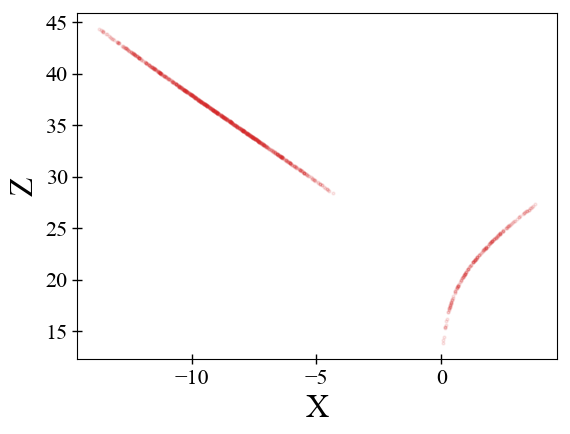

In [21]:
figure(figsize = (6,4))
plot(psos_chaotic[:, 1], psos_chaotic[:, 3], lw=0.0, marker ="o", ms = 2.0, alpha = 0.1, color = "C3");
xlabel("X"); ylabel("Z");

* We see that the surface of section is some kind of 1-dimensional object. 
* This is expected, because as we will show in the tutorial "Entropies & Dimensions" the Lorenz system (at least for the default parameters) lives in an almost 2-dimensional attractor.

* This means that when you take a cut through this object, the result should be 1-dimensional!

Let's now compute the PSOS for a parameter value where the Lorenz system is stable instead of chaotic:

In [22]:
set_parameter!(lor, 2, 69.75)

69.75

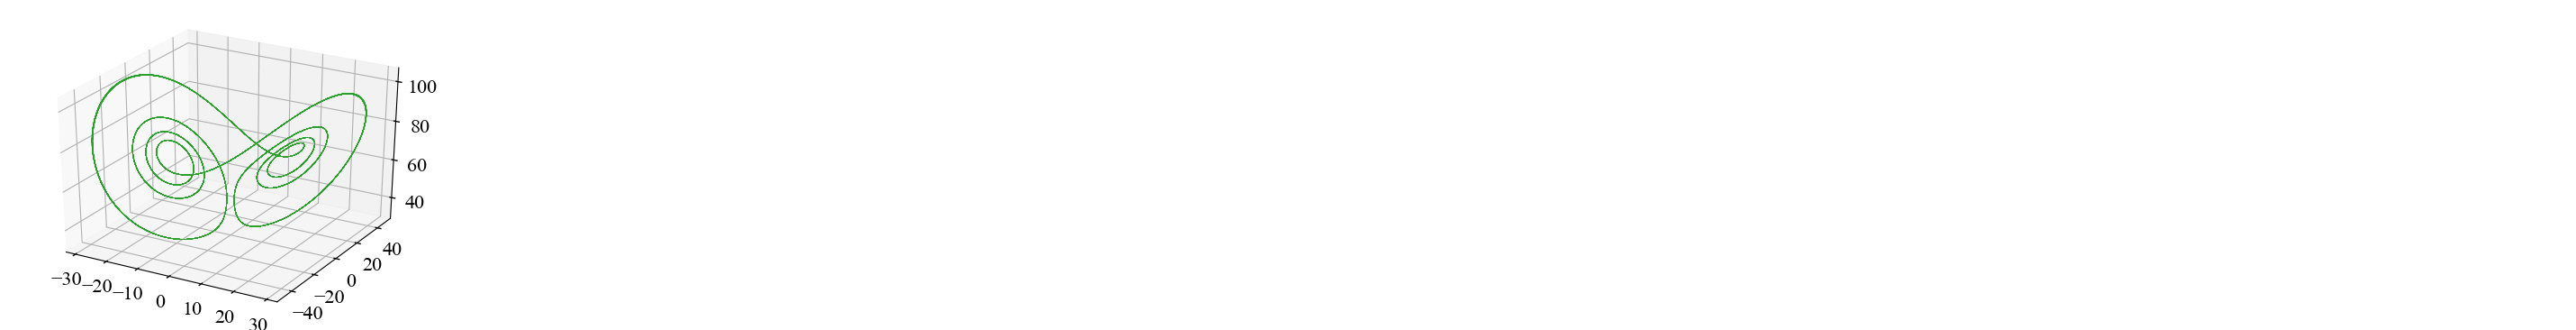

In [23]:
tr = trajectory(lor, 100.0, dt = 0.01, Ttr = 500.0)
figure(figsize = (6,4))
x, y, z = columns(tr)
plot3D(x,y,z, lw = 0.5, color = "C2");

In [24]:
psos_regular = poincaresos(lor, (2, 0.0), 2000.0, Ttr = 1000.0)
summary(psos_regular)

"3-dimensional Dataset{Float64} with 1710 points"

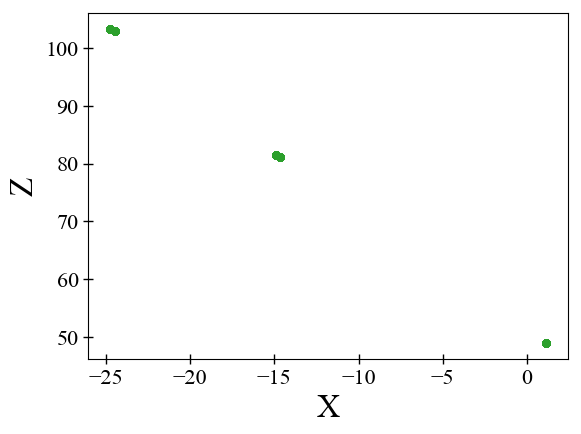

In [25]:
figure(figsize = (6,4))
plot(psos_regular[:, 1], psos_regular[:, 3], lw=0.0, marker ="o", ms = 5.0, alpha = 0.1, color = "C2");
xlabel("X"); ylabel("Z");

And here are the two different PSOS plots side by side:

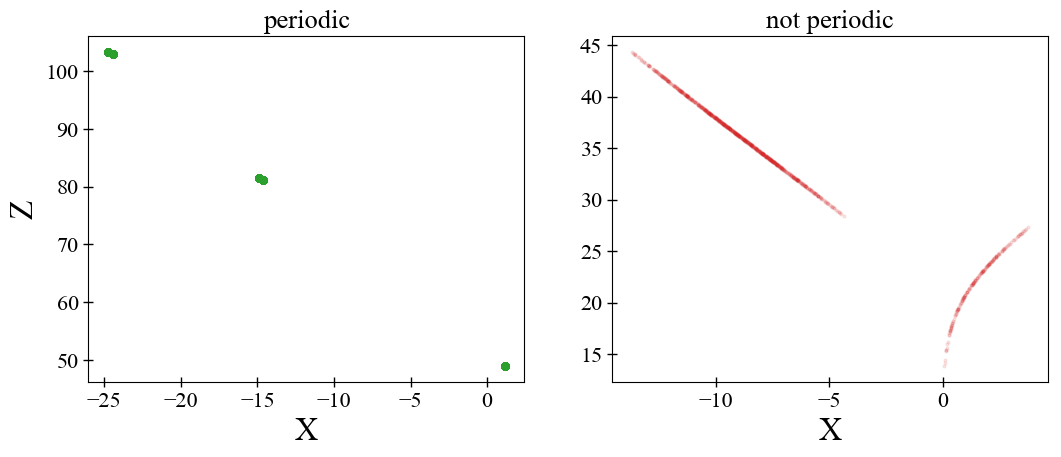

In [26]:
figure(figsize = (12,4))
subplot(121)
plot(psos_regular[:, 1], psos_regular[:, 3], lw=0.0, marker ="o", ms = 5.0, color = "C2", alpha = 0.1);
xlabel("X"); ylabel("Z"); title("periodic")
subplot(122)
plot(psos_chaotic[:, 1], psos_chaotic[:, 3], lw=0.0, marker ="o", ms = 2.0, color = "C3", alpha = 0.1);
xlabel("X"); title("not periodic");

## 2.B. Orbit diagrams of continuous systems

By computing PSOS at different parameters of a continuous systems, one can produce orbit diagrams for continuous systems. This is done with the function `produce_orbitdiagram` (for more, please read its documentation string).

It is simple to do:
```julia
produce_orbitdiagram(ds::ContinuousDynamicalSystem, plane, i::Int,
                     p_index, pvalues; kwargs...)
```
here `plane` is the mathematical definision of the hyperplane, as above. Then `i` is the variable of the system that we produce the PSOS for. `p_index` is the index of the *parameter* of the system that we will vary, while `pvalues` are the parameter values we will use.

In the first day of the conference we had some people present the orbit diagram of the Roessler system. Let's replicate this here:

In [27]:
x0, y0, z0 = 0.0, 1.0, 9.0
b, c = 2.0, 4.0

(2.0, 4.0)

In [28]:
ros = Systems.roessler([x0, y0, z0], b = b, c = c)

3-dimensional continuous dynamical system
 state:       [0.0, 1.0, 9.0]
 e.o.m.:      roessler_eom
 in-place?    false
 jacobian:    roessler_jacob
 parameters:  [0.2, 2.0, 4.0]

In [29]:
plane = (2, 0.0)
i = 1
p_index = 1 # the a parameter
pvalues = 0.32:0.001:0.55

0.32:0.001:0.55

In [30]:
output = produce_orbitdiagram(ros, plane, i, p_index, pvalues; Ttr = 2000.0, tfinal = 2000.0)
summary(output)

"231-element Array{Array{Float64,1},1}"

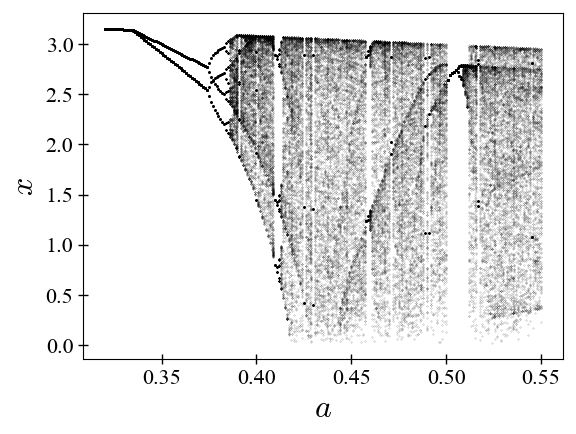

In [31]:
figure()
for (j, p) in enumerate(pvalues)
    plot(fill(p, length(output[j])), output[j], lw = 0,
    marker = "o", ms = 0.2, color = "black", alpha = 0.5)
end
xlabel("\$a\$"); ylabel("\$x\$");

## 2.B. Lyapunov exponents

### Definition
Lyapunov exponents measure the exponential separation rate of trajectories that are (initially) close. 

Consider the following picture, where two nearby trajectories are evolved in time:
 

<img src="lyapunov.png" alt="Sketch of the Lyapunov exponent" style="width: 500px;"/>


* $\lambda$ denotes the "maximum Lyapunov exponent".
* A $D$-dimensional system has $D$ exponents.
* In general, a trajectory is called "chaotic" if
    1. it follows nonlinear dynamics
    2. it is *bounded* (does not escape to infinity)
    2. it has at least one positive Lyapunov exponent

*(please be aware that the above is an over-simplification! See the textbooks cited in our documentation for more)*

---

### Demonstration

Before computing Lyapunov exponents, we'll demonstrate the concept of exponential separation using the Henon map that we used before

$$
\begin{aligned}
x_{n+1} &= 1 - ax_n^2 + y_n \\
y_{n+1} &= bx_n
\end{aligned}
$$

In [32]:
henon = Systems.henon()

2-dimensional discrete dynamical system
 state:       [0.0, 0.0]
 e.o.m.:      hoop
 in-place?    false
 jacobian:    hoop_jac
 parameters:  [1.4, 0.3]

First we'll generate a trajectory for the towel map, `tr1`, from the default initial condition,

In [33]:
tr1 = trajectory(henon, 100)
summary(tr1)

"2-dimensional Dataset{Float64} with 101 points"

and then we will generate a second trajectory, `tr2`, with a starting point slightly shifted from the initial condition of `tr1`.

In [34]:
u2 = get_state(henon) + (1e-9 * ones(dimension(henon)))
tr2 = trajectory(henon, 100, u2)
summary(tr2)

"2-dimensional Dataset{Float64} with 101 points"

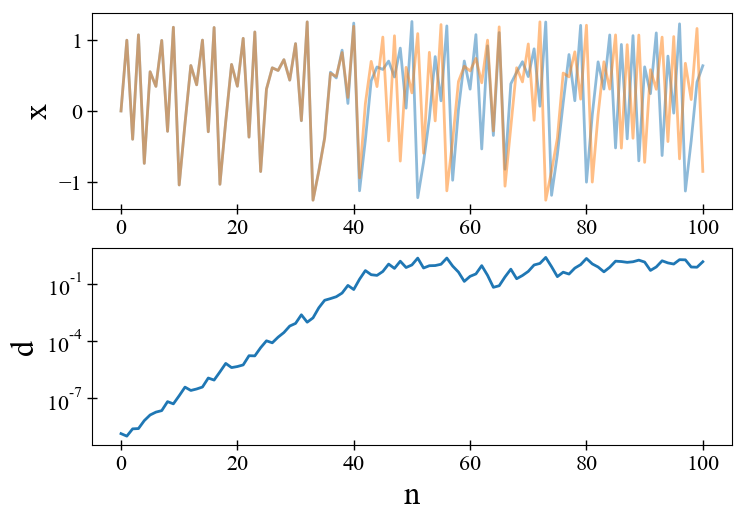

In [35]:
using LinearAlgebra: norm

figure(figsize=(8,5))

# Plot the x-coordinate of the two trajectories:
ax1 = subplot(2,1,1)
plot(tr1[:, 1], alpha = 0.5)
plot(tr2[:, 1], alpha = 0.5)
ylabel("x")

# Plot their distance in a semilog plot:
ax2 = subplot(2,1,2, sharex = ax1)
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
ylabel("d"); xlabel("n"); semilogy(d);

### Computing the Lyapunov Exponents

`lyapunov` is a function that calculates the maximum Lyapunov exponent for a DynamicalSystem (for a given starting point).

In [36]:
λ = lyapunov(henon, 5000) # second argument is time to evolve

0.424089183372981

This number is _approximately_ the slope of the distance increase!



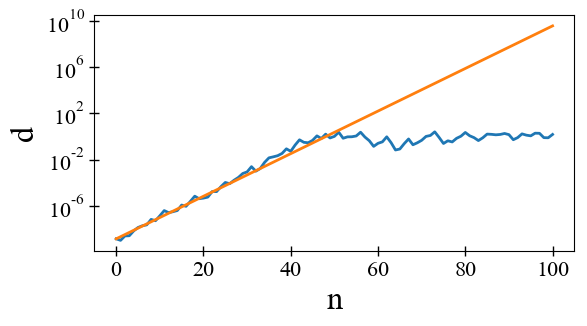

In [37]:
figure(figsize=(6,6))
# Plot the increasing distance of trajectories
ax2 = subplot(2,1,2, sharex = ax1)
d = [norm(tr1[i] - tr2[i]) for i in 1:length(tr2)]
x = 0:length(d)-1
semilogy(x, d);

# plot a line with exponential slope given by λ
plot(x, d[1] .* exp.(x .* λ))
ylabel("d"); xlabel("n");

If you want to get more than one Lyapunov exponents of a system, use `lyapunovs`

In [38]:
lyapunovs(henon, 2000)

2-element Array{Float64,1}:
  0.4216404579334208
 -1.6256132622593589

### Continuous systems

* All functions that accept a `DynamicalSystem` work with *any* instance of `DynamicalSystem`, regardless of whether it is continuous, discrete, in-place, out-of-place, with Jacobian or whatever.
* `lyapunov` and `lyapunovs` both accept a `DynamicalSystem`.

This means that they will "just work" if we use the Lorenz system, `lor`.


In [39]:
lor = Systems.lorenz()
lyapunov(lor, 2000.0)

0.891916246377175

In [40]:
lyapunovs(lor, 2000)

3-element Array{Float64,1}:
   0.8936911470185789  
   0.001302435325140301
 -14.561636100373688   

Remember from the Poincare section that for some parameter values the Lorenz system was periodic, for others it was not.

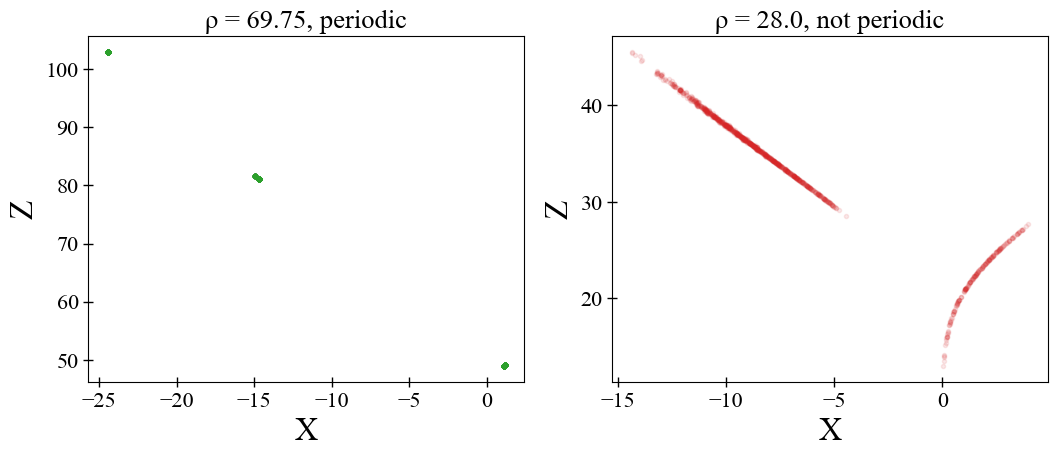

In [41]:
figure(figsize = (12,4))

ρs = (69.75, 28.0)

for (i, ρ) in enumerate(ρs)
    set_parameter!(lor, 2, ρ)
    psos = poincaresos(lor, (2, 0.0), 2000.0, Ttr = 2000.0)
    subplot(1,2,i)
    plot(psos[:, 1], psos[:, 3], lw=0.0, marker ="o", ms = 3.0, color = "C$(i+1)", alpha = 0.1);
    xlabel("X"); ylabel("Z"); title("ρ = $ρ, " * (i != 1 ? "not periodic" : "periodic"))
end

Seems like the exponent in the first case λ should be equal to zero, and in the second λ should be positive.

In [42]:
ρs = (69.75, 28.0)

for (i, ρ) in enumerate(ρs)
    set_parameter!(lor, 2, ρ)
    λ = lyapunov(lor, 2000.0; Ttr = 2000.0)
    println("For ρ = $ρ, λ = $λ")
end

For ρ = 69.75, λ = -0.00014990390240304403
For ρ = 28.0, λ = 0.9047748085497478


One has to be **very careful** when using functions like `lyapunovs`. They are approximative methods! Naively doing short computations or not using large transient times can lead to wrong results!

In [43]:
for (i, ρ) in enumerate(ρs)
    set_parameter!(lor, 2, ρ)
    λ = lyapunov(lor, 200.0) # smaller integration time, no transient time
    println("For ρ = $ρ, λ = $λ")
end

For ρ = 69.75, λ = 0.18490371491733312
For ρ = 28.0, λ = 0.7926460928213243


### Benchmarks

The Lyapunov exponent computations are quite fast! To benchmark them we can use the `BenchmarkTools` package.

In [44]:
using BenchmarkTools, OrdinaryDiffEq

In [45]:
diffeq = (reltol = 1e-6, abstol = 1e-6) 

(reltol = 1.0e-6, abstol = 1.0e-6)

In [46]:
@btime lyapunovs($lor, 2000; Ttr = 200, $diffeq...); # use default solver SimpleATsit5()

  56.367 ms (406 allocations: 31.59 KiB)


**DynamicalSystems.jl** interplays ncely with **DifferentialEquations.jl**. This means that (for example) you can choose the solver algorithm to be used when evolving a continuous dynamical system. 

For performance it is always imprortant to choose the correct solver! For example, even though `Vern9()` is a higher order solver than the default `Tsit5()`, it is faster for computing the exponent:

In [47]:
@btime lyapunovs($lor, 2000; Ttr = 200, $diffeq..., alg = Vern9());

  38.947 ms (431 allocations: 40.73 KiB)


This happens because `Vern9` can take larger steps. For more information visit the official documentation of **DynamicalSystems.jl**.

---

Discrete systems are also super faster!

In [48]:
tow = Systems.towel() # 3D discrete chaotic system

3-dimensional discrete dynamical system
 state:       [0.085, -0.121, 0.075]
 e.o.m.:      eom_towel
 in-place?    false
 jacobian:    jacob_towel
 parameters:  nothing

In [49]:
@btime lyapunovs($tow, 2000; Ttr = 200);

  250.879 μs (44 allocations: 3.95 KiB)


In [50]:
@btime lyapunov($tow, 2000; Ttr = 200);

  54.186 μs (18 allocations: 1.70 KiB)


# 3. Recurrence quantification analysis

The recurrence matrix is defined as

$$
R[i, j] = \begin{cases}
1 \quad \text{if}\quad d(x[i], x[j]) \le \varepsilon\\
0 \quad \text{else}
\end{cases}
$$

with $d(x[i], x[j])$ the distance between the two points at times $i, j$. You can use different metrics for $d$ and by default we use the Euclidean.

Notice that $x$ can be single timeseries or a full trajectory (also called multivariate timeseries).

## 3.A. Calculating recurrence matrices

In the previous examples we have been looking at the Lorenz system in different regimes. For starters lets see how the recurrence matrix the Lorenz system looks like in these cases

In [51]:
using DynamicalSystems
using PyPlot
PyPlot.rc("font", size = 16)          # set default fontsize
PyPlot.rc("figure", figsize = (6, 4)) # set default figsize

In [52]:
lor = Systems.lorenz()

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 e.o.m.:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 28.0, 2.66667]

To create a recurrence matrix simply use `RecurrenceMatrix(trajectory, ε)` with `ε` the distance threshold. `trajectory` could be anything really, `Vector, Dataset, Matrix`.

In [53]:
set_parameter!(lor, 2, 69.75) # stable regime for Lorenz

t = 5.0
dt = 0.01

tr = trajectory(lor, t; dt = dt, Ttr = 2000.0)

R = RecurrenceMatrix(tr, 5.0)

        RecurrenceMatrix of size (501, 501) with 5895 entries
    ┌────────────────────────────────────────────────────────────┐ 
    │               .:''                                      .::│
    │        .:'  .:'                                  .:'  .:'  │
    │      ''' .::'                                  ''' .::'    │
    │        .:'' .:'                                  .::' .:'  │
    │     .::'   :'                                 .::'   :'    │
    │   .:''                                      .:''           │
    │..:'                                      ..:'              │
    │:'                  ::'                 .::'                │
    │                                      .:''                  │
    │                              ..   .::'                     │
    │                            .:'' .::'                       │
    │                           '' ..:'  .                       │
    │                            .::' .::'                       │

To use a different metric, simply pass a different metric to the constructor. For example:

In [54]:
R = RecurrenceMatrix(tr, 5.0, metric = "cityblock")

        RecurrenceMatrix of size (501, 501) with 3295 entries
    ┌────────────────────────────────────────────────────────────┐ 
    │               .:''                                      .:'│
    │         .   .:'                                   :   .:'  │
    │          .::'                                      ..:'    │
    │        .:''  .                                   .:''  .   │
    │     .::'                                       .:'         │
    │   .:''                                      .:''           │
    │..:'                                      ..:'              │
    │:'                  .:                  .::'                │
    │                                      .:'                   │
    │                                   ..:'                     │
    │                              '  .:''                       │
    │                              ..:'                          │
    │                            .::'   '                        │

Of course, cross- and joint- recurrence matrices are available. It is also possible to compute recurrence matrices with a fixed recurrence rate instead of a fixed distance `ε`. See the documentation of `RecurrenceMatrix`!

## 3.B. Recurrence plots

Internally a recurrence matrix is represented as a sparse matrix. 
What you see above is a simple ASCII-based plot of the matrix (with dots at non-zero elements). 

There are three ways to visualize a recurrence matrix:

1. Using `recurrenceplot` for a text-based plot (for use in e.g. a terminal). This is the only function that "plots" immediatelly
2. Using `coordinates` which returns the coordinates of the nonzero elements as scatter data.
3. Using `grayscale` which creates a grayscale matrix representation.

In [55]:
x, y = coordinates(R)
hcat(x, y)

3295×2 Array{Int64,2}:
   1    1
   1    2
   1    3
   1    4
   1  176
   1  177
   1  178
   1  350
   1  351
   1  352
   1  353
   1  354
   2    1
   ⋮     
 498  498
 498  499
 499  148
 499  149
 499  498
 499  499
 500  149
 500  150
 500  500
 501  150
 501  151
 501  501

To plot this one has to use the plotting library of their choice:

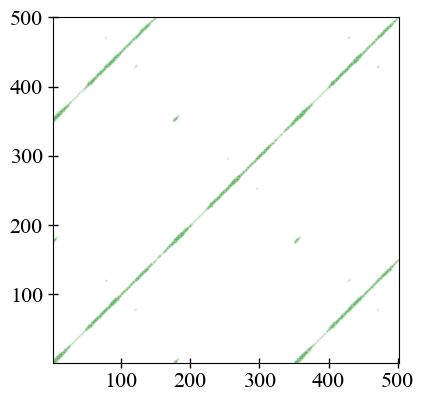

In [56]:
scatter(x, y, color = "C2", s = 1, alpha = 0.1)
xlim(1, size(R)[1]); ylim(1, size(R)[2]); gca().set_aspect("equal")

Notice that the above plot has its axis in index coordinates. One can modify this by indexing the time vector of the trajectory, which by default is `0:dt:t`.

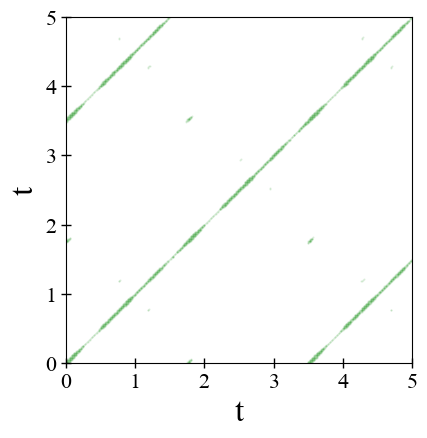

In [57]:
tvec = 0:dt:t

scatter(tvec[x], tvec[y], s = 1, color = "C2", alpha = 0.1)
xlim(0, t); ylim(0, t); gca().set_aspect("equal")
xlabel("t"); ylabel("t");

## 3.C. Typical recurrence plots

In the previous notebooks we explored the Lorenz system in a regular and chaotic regime.
Here is a comparison of a recurrence plot of the Lorenz system in these two regimes:

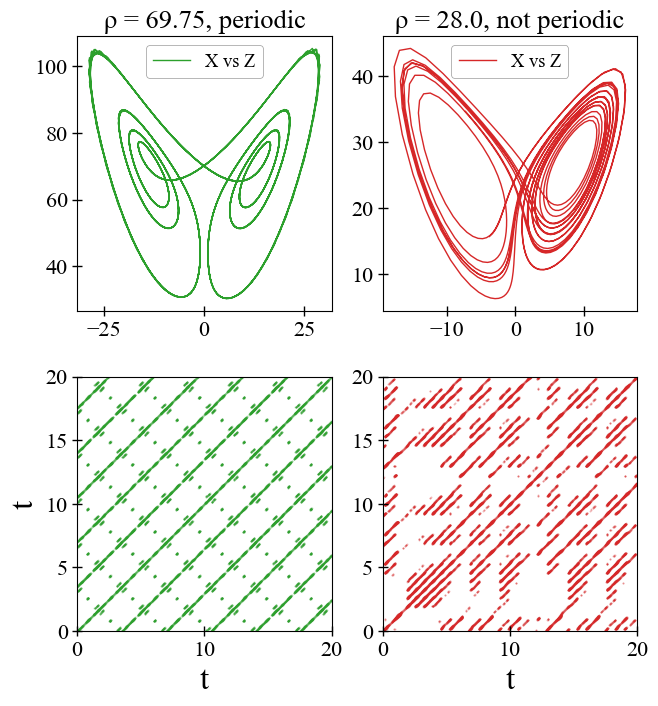

In [58]:
lor = Systems.lorenz()
figure(figsize = (7,7))

for (i, ρ) in enumerate((69.75, 28.0))
    set_parameter!(lor, 2, ρ)
    t, dt = 20.0, 0.02
    tr = trajectory(lor, t; dt = dt, Ttr = 2000.0)
    tvec = 0:dt:t
    
    subplot(2,2, i)
    plot(tr[:, 1], tr[:, 3], color = "C$(i+1)", lw = 1.0, label = "X vs Z")
    title("ρ = $ρ, " * (i != 1 ? "not periodic" : "periodic")); legend()
    
    #########################################################
    ε = i == 1 ? 5.0 : 3.0
    R = RecurrenceMatrix(tr, ε)
    x, y = coordinates(R)
    #########################################################
    
    subplot(2,2,i+2)
    scatter(tvec[x], tvec[y], s = 1, alpha = 0.2, color = "C$(i+1)")
    xlim(0, t); ylim(0, t); gca().set_aspect("equal")
    xlabel("t"); i == 1 && ylabel("t"); 
end

On the left we see long (potentially infinite) diagonals repeated for different times. This is the case for periodic systems as they visit exactly the same area on the phase space again and again. The vertical distance between the offset diagonals also coincides with the periodicity of the system, which is around `t ≈ 4`.

On the right we see a structure typical of chaotic motion on a strange attractor such as the one of the Lorenz system: the orbit visits neighborhoods of previous points but then quickly diverges again. This results in many small diagonal lines.

## 3.D. Quantification analysis

Plots are great, but most of the time one needs to go further. 

In [59]:
?rqa

search: rqa OrdinaryDiffEqAlgorithm



```
rqa(R; kwargs...)
```

Calculate all RQA parameters of a recurrence matrix `R`. See the functions referred to below for the definition of the different parameters and the default values of the arguments. Using this function is much more efficient than calling all individual functions one by one.

## Return

The returned value is a NamedTuple with the following entries:

  * `RR`: recurrence rate (see [`recurrencerate`](@ref))
  * `DET`: determinsm (see [`determinism`](@ref))
  * `L`: average length of diagonal structures (see [`dl_average`](@ref))
  * `Lmax`: maximum length of diagonal structures (see [`dl_max`](@ref))
  * `DIV`: divergence (see [`divergence`](@ref))
  * `ENTR`: entropy of diagonal structures (see [`dl_entropy`](@ref))
  * `TREND`: trend of recurrences (see [`trend`](@ref))
  * `LAM`: laminarity (see [`laminarity`](@ref))
  * `TT`: trapping time (see [`trappingtime`](@ref))
  * `Vmax`: maximum length of vertical structures (see [`vl_max`](@ref))
  * `VENTR`: entropy of vertical structures (see [`vl_entropy`](@ref))
  * `MRT`: mean recurrence time (see [`meanrecurrencetime`](@ref))
  * `RTE` recurrence time entropy (see [`rt_entropy`](@ref))
  * `NMPRT`: number of the most probable recurrence time (see [`nmprt`](@ref))

In the case of empty histograms (e.g. no existing vertical lines less than the keyword `lminvert`) the average and maximum values (`L`, `Lmax`, `TT`, `Vmax`, `MRT`) are returned as `0.0` but their respective entropies (`ENTR`, `VENTR`, `RTE`) are returned as `NaN`.

## Keyword Arguments

Standard keyword arguments are the ones accepted by the functions listed below, i.e. `theiler`, `lmin`, and `border`:

  * `theiler` is used to define a "Theiler window" around the central diagonal or "line of identity" (LOI): a region of points that are excluded in the calculation of RQA parameters, in order to rule out self-recurrences and apparent recurrences for smooth or high resolution data. The LOI is excluded by default for matrices of the types `RecurrenceMatrix` or `JointRecurrenceMatrix`, but it is included for matrices of the type `CrossRecurrenceMatrix`. `theiler=0` means that the whole matrix is scanned for lines. `theiler=1` means that the LOI is excluded. In general, `theiler=n` means that the `n` central diagonals are excluded (at both sides of the LOI, i.e. actually `2n-1` diagonals are excluded).
  * `lmin` is used to define the minimum line length in the parameters that describe the distributions of diagonal or vertical lines (it is set as 2 by default).
  * `border` is used to avoid border effects in the calculation of `TREND` (cf. [`trend`](@ref)).

In addition `theilerdiag`, `lmindiag` may be used to declare specific values that override the values of `theiler` and `lmin` in the calculation of parameters related to diagonal structures. Likewise, `theilervert` and `lminvert` can be used for the calculation of parameters related to vertical structures.

The keyword argument `onlydiagonal` (`false` by default) can be set to `true` in order to restrict the analysis to the recurrence rate and the parameters related to diagonal structures (`RR`, `DET`, `L`, `Lmax`, `DIV` and `ENTR`), which makes this function slightly faster.


In [60]:
?laminarity

search: laminarity ExtrapolationMidpointHairerWanner



```
laminarity(R[; lmin=2, theiler])
```

Calculate the laminarity of the recurrence matrix `R`.

## Description

The laminarity is calculated as:

$$
LAM = \frac{\sum_{v=lmin}{v P(l)}}{\sum_{v=1}{v P(v)}} =
\frac{\sum_{v=lmin}{v P(l)}}{\sum R}
$$

where $v$ stands for the lengths of vertical lines in the matrix, and $P(v)$ is the number of lines of length equal to $v$.

`lmin` is set to 2 by default, and this calculation rules out all the points inside the Theiler window (see [`rqa`](@ref) for the default values and usage of the keyword argument `theiler`).


In [61]:
RQA = rqa(R, theiler = 10, lmin = 5)

(RR = 0.029383402233000226, DET = 0.9741051028179741, L = 18.13015463917526, Lmax = 238, DIV = 0.004201680672268907, ENTR = 3.4465305204300325, TREND = -0.0054139526208256, LAM = 0.4051789794364052, TT = 5.762678483505662, Vmax = 10, VENTR = 1.1634440350556325, MRT = 93.17307924255216, RTE = 3.744973244503583, NMPRT = 687)

There are a lot of measures that one can compute from a recurrence matrix. Too many in fact, so for this notebook we will consider only a few of them: `determinism`, maximum and average diagonal line length and `divergence` (which is simply 1/(maximum diagonal length)).

In [63]:
lor = Systems.lorenz()
for (i, ρ) in enumerate((69.75, 28.0))
    println("\nρ = $ρ ")
    set_parameter!(lor, 2, ρ)
    t, dt = 20.0, 0.01
    tr = trajectory(lor, t; dt = dt, Ttr = 200.0)
    
    ε = i == 1 ? 5.0 : 3.0
    R = RecurrenceMatrix(tr, ε)
    
    RQA = rqa(R, theiler = 10, lmin = 5)

    println("maximum diagonal: ", RQA.Lmax)
    println("average diagonal: ", RQA.L)
    println("determinism: ", RQA.DET)
    println("divergence (t-units): ", RQA.DIV/dt)
end


ρ = 69.75 
maximum diagonal: 1650
average diagonal: 32.21234119782214
determinism: 0.992895502349519
divergence (t-units): 0.06060606060606061

ρ = 28.0 
maximum diagonal: 275
average diagonal: 29.40611075747931
determinism: 0.9956679167205483
divergence (t-units): 0.36363636363636365


## 3.E. Hot GitHub issues - invitation to contribute!

Check out these bad boys: 

1. [Methods to estimate `ε`](https://github.com/JuliaDynamics/RecurrenceAnalysis.jl/issues/67). Solve this issue and get 100$!
2. [Optimize the calculation of recurrence matrix](https://github.com/JuliaDynamics/RecurrenceAnalysis.jl/issues/22). `recurrencematrix` actually computes a cross-recurrence matrix with same x and y. This can be optimized (using multiple dispatch) to instead leverage the symmetry of the recurrence matrix (and reduce computation time by a factor of 2!). This issue is exactly the same as the extention we did for `OneHotVector` in the previous notebook...
3. More issues in our GitHub page: https://github.com/JuliaDynamics/RecurrenceAnalysis.jl/issues 

We welcome any kind of contributions, including implementations of new methods.

# 4. Exercises

## 4.1. PSOS of the Henon-Heiles system
The Henon-Heiles is implemented in **DynamicalSystems.jl** as `Systems.henonheiles()`. Using the `poincaresos` function try to find 1 periodic (or quasi-periodic) and 1 chaotic orbit of the system (simply plotting the resulting PSOS should be enough to deduce if the orbit is chaotic or not).

Hint: use `plane = (1, 0.0)` and visualize the 4th versus 2nd variable.

## 4.2. Lyapunovs versus parameters
Using the function `lyapunovs` and `set_parameter!`, create a plot that shows how the Lyapunov exponents of a dynamical system of your choice vary with a parameter change. Demonstrate this in a plot that shows `λ` vs the parameter that is varied (each exponent in different color).

# 5. Open discussion

- Discuss your questions
- Something *specific* that you want to learn from the **DynamicalSystems.jl** map?